In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [21]:
# Paso 2: Cargar el dataset
data = pd.read_csv("data/recetas.csv")
print("Shape:", data.shape)
data.head()

Shape: (100, 16)


,title,servings,readyInMinutes,cookingMinutes,preparationMinutes,healthScore,spoonacularScore,pricePerServing,cheap,dairyFree,glutenFree,sustainable,vegan,vegetarian,veryHealthy,veryPopular
0,Red Lentil Soup with Chicken and Turnips,8,55,45.0,10.0,100.0,99.428001,300.45,False,True,True,False,False,False,True,True
1,Asparagus and Pea Soup: Real Convenience Food,2,20,NaN,NaN,100.0,99.417381,178.37,False,True,True,False,True,True,True,False
2,Garlicky Kale,2,45,NaN,NaN,83.0,98.943375,69.09,False,True,True,False,True,True,True,False
3,Slow Cooker Beef Stew,6,490,480.0,10.0,100.0,98.848091,270.41,False,True,True,False,False,False,True,False
4,Red Kidney Bean Jambalaya,6,45,NaN,NaN,96.0,98.818451,168.43,False,True,True,False,True,True,True,False


In [22]:
# 1. Selección de variables predictoras (X) y objetivo (y)
X = data[["veryHealthy", "glutenFree", "healthScore"]]
y = data["vegan"]

In [23]:
X

,veryHealthy,glutenFree,healthScore
0,True,True,100.0
1,True,True,100.0
2,True,True,83.0
3,True,True,100.0
4,True,True,96.0
...,...,...,...
95,True,True,100.0
96,True,True,100.0
97,True,True,90.0
98,True,False,100.0


In [24]:
y

0     False
1      True
2      True
3     False
4      True
      ...  
95     True
96    False
97     True
98     True
99    False
Name: vegan, Length: 100, dtype: bool

In [25]:
# 4. Preprocesamiento: escalar y codificar
columnas_categoricas = ['veryHealthy', 'glutenFree']
columnas_numericas = ['healthScore']

preprocesador = ColumnTransformer(transformers=[
    ('num', StandardScaler(), columnas_numericas),
    ('cat', OneHotEncoder(), columnas_categoricas)
])

In [26]:
modelo = Pipeline(steps=[
    ('preprocesamiento', preprocesador),
    ('clasificador', LogisticRegression())
])

In [27]:
# 6. Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo.fit(X_train, y_train)

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['healthScore']),
                                                 ('cat', OneHotEncoder(),
                                                  ['veryHealthy',
                                                   'glutenFree'])])),
                ('clasificador', LogisticRegression())])

In [28]:
# 8. Predicción
y_pred = modelo.predict(X_test)
y_pred

array([False, False, False,  True,  True,  True, False, False,  True,
        True, False, False, False, False, False,  True, False,  True,
       False, False])

In [29]:
y_test

83    False
53    False
70    False
45     True
44     True
39    False
22    False
80    False
10    False
0     False
18     True
30    False
73    False
33     True
90     True
4      True
76    False
77    False
12     True
31     True
Name: vegan, dtype: bool

In [30]:
y_pred

array([False, False, False,  True,  True,  True, False, False,  True,
        True, False, False, False, False, False,  True, False,  True,
       False, False])

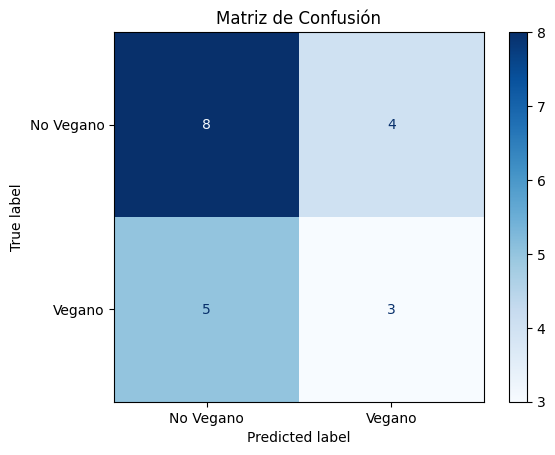

In [32]:
# 9. Matriz de confusión (antes de métricas)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Vegano', 'Vegano'])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()

In [33]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay


# 10. Métricas
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precisión (accuracy):", accuracy)
print("Sensibilidad (recall para clase 'Vegano'):", recall)


Precisión (accuracy): 0.55
Sensibilidad (recall para clase 'Vegano'): 0.375


In [ ]:
# 10. Predicción para nuevo individuo
nuevo = pd.DataFrame({
    'healthScore': [50.0],
    'veryHealthy': [True],
    'glutenFree': [False]
})

resultado = modelo.predict(nuevo)
print("¿Sera Vegano?", "Sí" if resultado[0] == 1 else "No")

¿Sera Vegano? No
